# Nemo Installation

In [ ]:
!pip install git+https://github.com/NVIDIA/NeMo.git@main#egg=nemo_toolkit[all]

DEPRECATION: git+https://github.com/NVIDIA/NeMo.git@main#egg=nemo_toolkit[all] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Cloning https://github.com/NVIDIA/NeMo.git (to revision main) to /tmp/pip-install-pentwi0u/nemo-toolkit_856fb8c4d1ed4ce58a5efeedaef6c843
  Running command git clone --filter=blob:none --quiet https://github.com/NVIDIA/NeMo.git /tmp/pip-install-pentwi0u/nemo-toolkit_856fb8c4d1ed4ce58a5efeedaef6c843
  Resolved https://github.com/NVIDIA/NeMo.git to commit 36adc7e0943a9654c21a89a8b5b8b33ed6c2efcc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 94

# Pre-trained model

Model: Conformer-large (https://www.isca-speech.org/archive/interspeech_2020/gulati20_interspeech.html)
https://catalog.ngc.nvidia.com/orgs/nvidia/teams/nemo/models/stt_en_conformer_ctc_large


Dataset: LibriSpeech (https://openslr.org/12/)

Tokenizer: Byte-pair Encoding by Sentencepiece (https://github.com/google/sentencepiece)



## Model load

In [ ]:
import nemo.collections.asr as nemo_asr

In [ ]:
model = nemo_asr.models.EncDecCTCModelBPE.from_pretrained(model_name="stt_en_conformer_ctc_large_ls")

[NeMo I 2023-07-13 14:18:02 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/stt_en_conformer_ctc_large_ls/versions/1.0.0/files/stt_en_conformer_ctc_large_ls.nemo to /root/.cache/torch/NeMo/NeMo_1.20.0rc0/stt_en_conformer_ctc_large_ls/1ea6a779af1742c38ff9945aa70b3dc3/stt_en_conformer_ctc_large_ls.nemo
[NeMo I 2023-07-13 14:18:15 common:913] Instantiating model from pre-trained checkpoint
[NeMo I 2023-07-13 14:18:19 mixins:170] Tokenizer SentencePieceTokenizer initialized with 128 tokens


[NeMo W 2023-07-13 14:18:19 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data/Librispeech_SP_Tarred/tarred_audio_manifest.json
    sample_rate: 16000
    batch_size: 16
    shuffle: true
    num_workers: 8
    pin_memory: true
    use_start_end_token: false
    trim_silence: false
    max_duration: 16.7
    min_duration: 0.1
    shuffle_n: 2048
    is_tarred: true
    tarred_audio_filepaths: /data/Librispeech_SP_Tarred/audio__OP_0..511_CL_.tar
    
[NeMo W 2023-07-13 14:18:19 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath:
    - /manifests/librispeech/librivox-dev-other.json
    - /manife

[NeMo I 2023-07-13 14:18:20 features:289] PADDING: 0
[NeMo I 2023-07-13 14:18:23 save_restore_connector:249] Model EncDecCTCModelBPE was successfully restored from /root/.cache/torch/NeMo/NeMo_1.20.0rc0/stt_en_conformer_ctc_large_ls/1ea6a779af1742c38ff9945aa70b3dc3/stt_en_conformer_ctc_large_ls.nemo.


In [ ]:
from omegaconf import OmegaConf, open_dict
print(OmegaConf.to_yaml(model.cfg))

sample_rate: 16000
log_prediction: true
ctc_reduction: mean_batch
train_ds:
  manifest_filepath: /data/Librispeech_SP_Tarred/tarred_audio_manifest.json
  sample_rate: 16000
  batch_size: 16
  shuffle: true
  num_workers: 8
  pin_memory: true
  use_start_end_token: false
  trim_silence: false
  max_duration: 16.7
  min_duration: 0.1
  shuffle_n: 2048
  is_tarred: true
  tarred_audio_filepaths: /data/Librispeech_SP_Tarred/audio__OP_0..511_CL_.tar
validation_ds:
  manifest_filepath:
  - /manifests/librispeech/librivox-dev-other.json
  - /manifests/librispeech/librivox-dev-clean.json
  - /manifests/librispeech/librivox-test-other.json
  - /manifests/librispeech/librivox-test-clean.json
  sample_rate: 16000
  batch_size: 16
  shuffle: false
  num_workers: 8
  pin_memory: true
  use_start_end_token: false
  is_tarred: false
  tarred_audio_filepaths: /data/LibriSpeech/eval__OP_0..1023_CL_.tar
test_ds:
  manifest_filepath:
  - /manifests/librispeech/librivox-dev-other.json
  - /manifests/libri

## Tokenizer and Vocabulary

### Tokenizer



In [ ]:
tokenizer = model.tokenizer.tokenizer
print(tokenizer.encode_as_pieces('hello word'))

['▁he', 'll', 'o', '▁w', 'or', 'd']


### output units

vocab: 1+127+1 (<unk> + tokens + blank)


In [ ]:
vocab = model.tokenizer.vocab
print(vocab)

['<unk>', 'e', 's', '▁', 't', 'a', 'o', 'i', '▁the', 'd', 'l', 'n', '▁a', 'm', 'y', 'u', '▁s', 'p', 'ed', 'c', '▁and', 're', '▁to', '▁of', 'r', 'w', 'ing', '▁w', 'h', '▁p', '▁c', 'er', 'f', 'k', 'ar', '▁in', '▁f', '▁b', 'g', 'an', 'in', '▁i', 'en', '▁he', 'le', '▁g', 'or', 'll', 'b', '▁be', 'ro', 'st', 'on', '▁d', 'v', 'ly', 'ce', 'ur', 'es', '▁that', '▁o', 'us', '▁was', '▁it', '▁th', 've', 'ch', 'un', 'al', '▁t', '▁ma', 'ri', '▁you', '▁on', 'ver', 'ent', '▁for', '▁re', 'ra', "'", '▁his', 'ir', 'ter', '▁with', '▁her', 'it', 'th', '▁mo', '▁me', '▁ha', '▁e', '▁as', 'tion', '▁had', '▁not', '▁no', '▁do', 'ther', '▁but', '▁st', '▁she', '▁is', 'igh', '▁ho', '▁lo', 'ng', '▁him', '▁an', 'ck', 'j', 'ugh', '▁de', '▁li', '▁mi', '▁la', '▁my', '▁con', '▁have', '▁this', '▁which', 'q', '▁up', '▁said', '▁from', '▁who', '▁ex', 'x', 'z']


In [ ]:
len(vocab)

128

In [ ]:
with open('tokens.txt', 'w') as f:
  for k, v in enumerate(vocab):
    f.write(str(v) + ' '+str(k)+ '\n')

### words

'word.raw' file: All words in language model(librispeech dataset)


In [ ]:
with open('word.raw', 'r') as f:
  wlist = f.read().splitlines()

In [ ]:
wlist

['<eps>',
 'A',
 "A''S",
 "A''T",
 "A'A",
 "A'AD",
 "A'ADE",
 "A'AIN'T",
 "A'AL",
 "A'AM",
 "A'AN",
 "A'ANA",
 "A'ANDY",
 "A'ANE",
 "A'ANT",
 "A'ARF",
 "A'AZAM",
 "A'B'C'D",
 "A'B'CD",
 "A'B'D'D'C'A",
 "A'B'ILIN",
 "A'BANGIN",
 "A'BAS",
 "A'BC'D",
 "A'BCD",
 "A'BDUI",
 "A'BEAR",
 "A'BECKET",
 "A'BECKETT",
 "A'BECKETT'S",
 "A'BEEN",
 "A'BEGGING",
 "A'BEIN",
 "A'BEIT",
 "A'BIDING",
 "A'BILIN",
 "A'BIN",
 "A'BITIN",
 "A'BJECT",
 "A'BLED",
 "A'BO'BO",
 "A'BOARD",
 "A'BODY",
 "A'BODY'S",
 "A'BOILING",
 "A'BOORD",
 "A'BOTHERED",
 "A'BRA",
 "A'BRAM",
 "A'BSOLUTE",
 "A'BSTRACT",
 "A'BUD",
 "A'BUILDING",
 "A'BURNIN",
 "A'BUS",
 "A'CALLIN",
 "A'CALLING",
 "A'CARRYING",
 "A'CCENT",
 "A'CCIDENT",
 "A'CCURACY",
 "A'CENTRIC",
 "A'CICIVETTA",
 "A'CIRCLING",
 "A'CIS",
 "A'CLOCK",
 "A'COCK",
 "A'COMIN",
 "A'CORDIN",
 "A'COUNT",
 "A'COURSE",
 "A'COURT",
 "A'COURT'S",
 "A'COURTING",
 "A'COURTOIS",
 "A'CRID",
 "A'CRUISIN",
 "A'CUSSIN",
 "A'D",
 "A'DALE",
 "A'DANCING",
 "A'DDISON",
 "A'DES",
 "A'DOBE",
 "A

In [ ]:
len(wlist)

909214

In [ ]:
with open('words.txt', 'w') as f:
  for k, v, in enumerate(wlist):
    f.write(str(v)+' '+str(k)+'\n')

## Lexicon

### wordpiece

In [ ]:
pieces = []
for i in wlist:
  pieces.append(tokenizer.encode_as_pieces(i))

In [ ]:
pieces

[['▁', '<', 'e', 'p', 's', '>'],
 ['▁a'],
 ['▁a', "'", "'", 's'],
 ['▁a', "'", "'", 't'],
 ['▁a', "'", 'a'],
 ['▁a', "'", 'a', 'd'],
 ['▁a', "'", 'a', 'd', 'e'],
 ['▁a', "'", 'a', 'in', "'", 't'],
 ['▁a', "'", 'al'],
 ['▁a', "'", 'a', 'm'],
 ['▁a', "'", 'an'],
 ['▁a', "'", 'an', 'a'],
 ['▁a', "'", 'an', 'd', 'y'],
 ['▁a', "'", 'an', 'e'],
 ['▁a', "'", 'an', 't'],
 ['▁a', "'", 'ar', 'f'],
 ['▁a', "'", 'a', 'z', 'a', 'm'],
 ['▁a', "'", 'b', "'", 'c', "'", 'd'],
 ['▁a', "'", 'b', "'", 'c', 'd'],
 ['▁a', "'", 'b', "'", 'd', "'", 'd', "'", 'c', "'", 'a'],
 ['▁a', "'", 'b', "'", 'i', 'l', 'in'],
 ['▁a', "'", 'b', 'a', 'ng', 'in'],
 ['▁a', "'", 'b', 'a', 's'],
 ['▁a', "'", 'b', 'c', "'", 'd'],
 ['▁a', "'", 'b', 'c', 'd'],
 ['▁a', "'", 'b', 'd', 'u', 'i'],
 ['▁a', "'", 'b', 'e', 'ar'],
 ['▁a', "'", 'b', 'e', 'ck', 'e', 't'],
 ['▁a', "'", 'b', 'e', 'ck', 'e', 't', 't'],
 ['▁a', "'", 'b', 'e', 'ck', 'e', 't', 't', "'", 's'],
 ['▁a', "'", 'b', 'e', 'en'],
 ['▁a', "'", 'b', 'e', 'g', 'g', 'ing'],


In [ ]:
len(pieces)

909214

### Lexicon format

lexicon: word token pair (except for special symbols)

In [ ]:
lexicon = list(zip(wlist, pieces))

In [ ]:
with open('lexicon.txt', "w", encoding="utf-8") as f:
  for word, tokens in lexicon[1:-1]: # special symbol removal
    f.write(f"{word} {' '.join(tokens)}\n")

In [ ]:
len(lexicon)

909214

# Test set logits

## Test set load

Librispeech test-clean set

HuggingFace URL: https://huggingface.co/datasets/kresnik/librispeech_asr_test



In [ ]:
!pip install datasets
from datasets import load_dataset
ds = load_dataset("kresnik/librispeech_asr_test", "clean")
test_ds = ds['test']
fl = test_ds['file']

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.7 MB/s eta 0:00:00


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset librispeech_asr_test downloaded and prepared to /root/.cache/huggingface/datasets/kresnik___librispeech_asr_test/clean/2.1.0/16bc288fa237b20821c5b51c8c09426b2689d8c5a889287589cb12aba6705e74. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

## logit extraction

extracting log-probabilities using Nemo model and huggingface dataset

In [ ]:
len(fl)

2620

In [ ]:
r = model.transcribe(fl, logprobs=True)

Transcribing:   0%|          | 0/655 [00:00<?, ?it/s]

In [ ]:
r

[array([[-66.93488 , -20.508978, -23.4898  , ..., -27.35957 , -31.307674,
           0.      ],
        [-70.24339 , -23.52446 , -25.998486, ..., -30.890179, -32.40095 ,
           0.      ],
        [-72.18523 , -24.728676, -28.462872, ..., -33.93405 , -34.572758,
           0.      ],
        ...,
        [-71.724495, -25.31755 , -30.220783, ..., -33.185425, -32.408184,
           0.      ],
        [-71.02451 , -25.005272, -30.778944, ..., -32.6984  , -32.60385 ,
           0.      ],
        [-66.09859 , -22.23661 , -29.026058, ..., -31.747185, -31.724981,
           0.      ]], dtype=float32),
 array([[-69.39372 , -21.986912, -28.403906, ..., -30.057919, -34.47684 ,
           0.      ],
        [-70.210846, -24.132683, -29.047567, ..., -32.34072 , -34.059395,
           0.      ],
        [-69.902084, -24.512672, -29.39923 , ..., -33.92211 , -34.058594,
           0.      ],
        ...,
        [-69.012344, -25.927202, -31.345818, ..., -37.36154 , -35.32483 ,
           0.      

## save logits

save logits as pt file

In [ ]:
import torch

out_list = []
for i in r:
  out_list.append(torch.tensor(i))

In [ ]:
out_list

[tensor([[-66.9349, -20.5090, -23.4898,  ..., -27.3596, -31.3077,   0.0000],
         [-70.2434, -23.5245, -25.9985,  ..., -30.8902, -32.4010,   0.0000],
         [-72.1852, -24.7287, -28.4629,  ..., -33.9341, -34.5728,   0.0000],
         ...,
         [-71.7245, -25.3176, -30.2208,  ..., -33.1854, -32.4082,   0.0000],
         [-71.0245, -25.0053, -30.7789,  ..., -32.6984, -32.6039,   0.0000],
         [-66.0986, -22.2366, -29.0261,  ..., -31.7472, -31.7250,   0.0000]]),
 tensor([[-69.3937, -21.9869, -28.4039,  ..., -30.0579, -34.4768,   0.0000],
         [-70.2108, -24.1327, -29.0476,  ..., -32.3407, -34.0594,   0.0000],
         [-69.9021, -24.5127, -29.3992,  ..., -33.9221, -34.0586,   0.0000],
         ...,
         [-69.0123, -25.9272, -31.3458,  ..., -37.3615, -35.3248,   0.0000],
         [-70.8295, -26.2459, -32.0306,  ..., -38.0119, -35.5788,   0.0000],
         [-69.0988, -26.3927, -32.5917,  ..., -38.1375, -35.1160,   0.0000]]),
 tensor([[-71.6538, -22.5462, -26.4601,  ...

In [ ]:
torch.save(out_list, 'logits.pt')

In [ ]:
out_list[0].shape

torch.Size([487, 129])

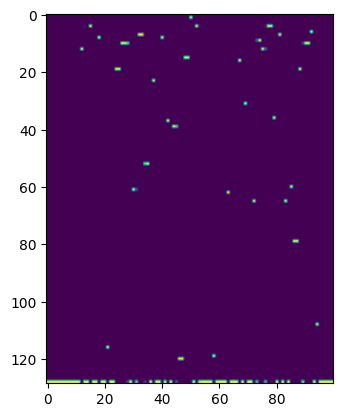

In [ ]:
import matplotlib.pyplot as plt
out = torch.exp(out_list[0])
plt.imshow(out.T[:,:100])

## save reference

save reference text

In [ ]:
with open('ref.txt', 'w') as f:
  for i in test_ds['text']:
    f.write(i+'\n')